In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros_populares/main/2%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/carros_populares_manipulado.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,agile,1.4,91000.0,2011,25990.0,Agile 1.4 Lt 5p
1,chevrolet,agile,1.4,78400.0,2011,23499.0,Agile 1.4 Ltz 5p
2,chevrolet,agile,1.4,123915.0,2013,28900.0,Agile 1.4 Ltz 5p
3,chevrolet,agile,1.4,91000.0,2013,28000.0,Agile 1.4 Lt 5p
4,chevrolet,agile,1.4,106863.0,2014,31990.0,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          11904 non-null  object 
 1   modelo         11904 non-null  object 
 2   motor          11285 non-null  float64
 3   quilometragem  11904 non-null  float64
 4   ano            11904 non-null  int64  
 5   preco          11904 non-null  float64
 6   informacoes    11904 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 651.1+ KB


 - Excluindo os valores ausentes.

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

marca            0
modelo           0
motor            0
quilometragem    0
ano              0
preco            0
informacoes      0
dtype: int64

In [8]:
df.shape

(11285, 7)

##  Filtrando o DataFrame.

In [9]:
df.describe().round(4)

,motor,quilometragem,ano,preco
count,11285.0000,1.128500e+04,11285.0000,1.128500e+04
mean,1.6849,3.442857e+04,2014.0343,6.682734e+04
std,0.5016,5.254591e+06,5.2977,5.511377e+05
min,1.0000,-5.580386e+08,1969.0000,3.990000e+03
25%,1.4000,3.300000e+04,2011.0000,2.890000e+04
50%,1.6000,7.600000e+04,2014.0000,4.390000e+04
75%,2.0000,1.190000e+05,2019.0000,7.199000e+04
max,4.0000,9.999990e+05,2022.0000,3.990000e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DF66E0AF0>,
      dtype=object)

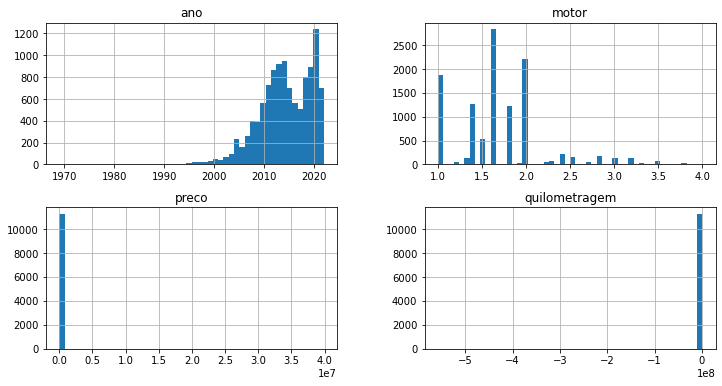

In [10]:
df.hist(bins = 50, figsize=(12,6))

 - Pegando apenas ps veículos com quilometragem acima de 5 mil km, pois tem alguns dados incoerentes nessa faixa de quilometragem.

In [11]:
df.query('quilometragem <= 5000')

,marca,modelo,motor,quilometragem,ano,preco,informacoes
12,chevrolet,agile,1.4,0.0,2011,22320.0,Agile 1.4 Mpfi Lt 8v Flex 4p Manual
33,chevrolet,agile,1.4,1.0,2013,29400.0,Agile 1.4 Ltz Easytronic 5p
36,chevrolet,agile,1.4,100.0,2012,29900.0,Agile 1.4 Mpfi Ltz 8v Flex 4p Manual 2011/2012
44,chevrolet,agile,1.4,123.0,2011,25990.0,Agile 1.4 Mpfi Ltz 8v
47,chevrolet,agile,1.4,0.0,2013,28900.0,Agile 1.4 Mpfi Ltz 8v Flex 4p Manual
...,...,...,...,...,...,...,...
11840,mitsubishi,Pajero-TR4,2.0,1.0,2008,27000.0,Pajero Pajero Tr4 2.0 Flex 4x4 Automatica
11859,mitsubishi,Pajero-TR4,2.0,1111.0,2013,50000.0,Pajero Tr4 2.0 Flex Aut. 5p
11865,mitsubishi,Pajero-TR4,2.0,1.0,2004,25000.0,Pajero Tr4 2.0 5p
11889,mitsubishi,Pajero-TR4,2.0,0.0,2010,40000.0,Pajero 2.0 Flex


In [12]:
df = df.query('quilometragem >= 5000')

 - Observando outliers

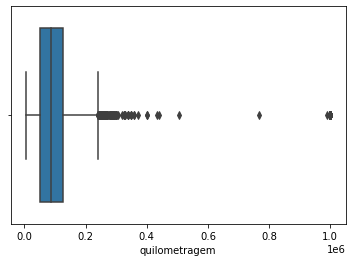

In [13]:
sns.boxplot(df['quilometragem'])

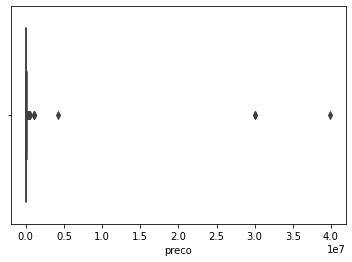

In [14]:
sns.boxplot(df['preco'])

 - Visualizando a distribuição dos dados.

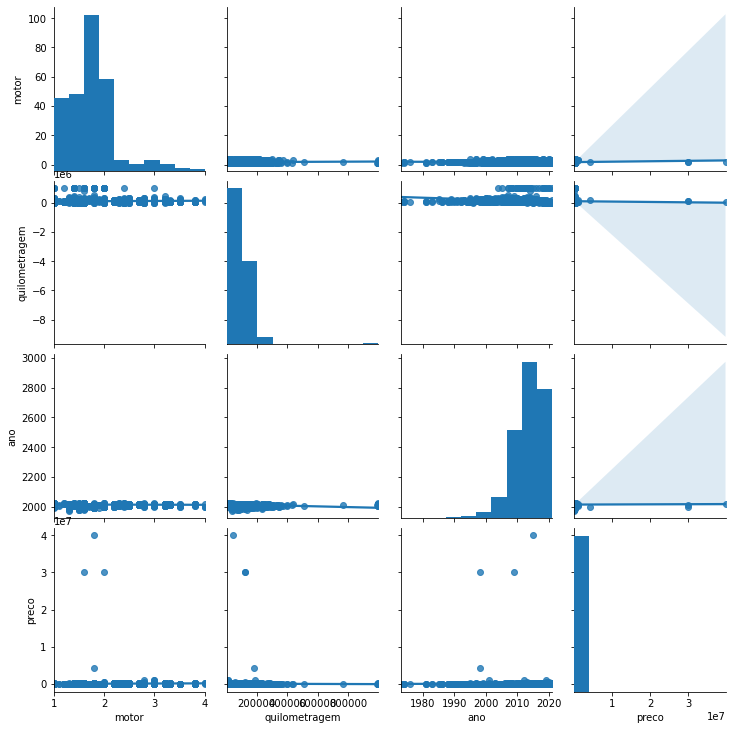

In [15]:
sns.pairplot(data=df, kind='reg' )

## Removendo outliers

 - Preço

In [16]:
dados = df.query('preco <=200000')

 - Quilometragem

In [17]:
dados.shape

(9546, 7)

In [18]:
dados = dados.query('quilometragem <= 200000')

 - Visualizando a distribuição dos dados após realizar alguns filtros.

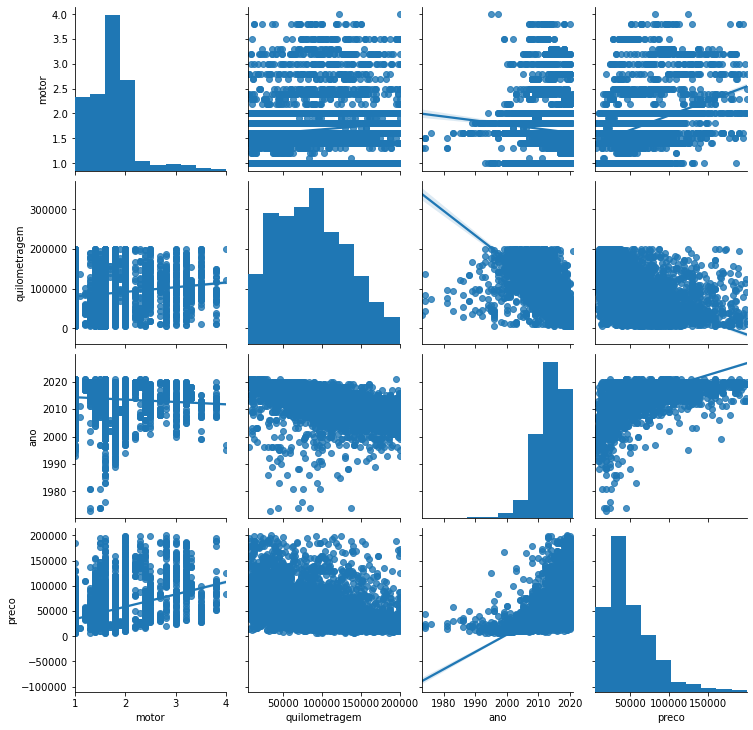

In [19]:
sns.pairplot(data=dados, kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DF965A1C0>,
      dtype=object)

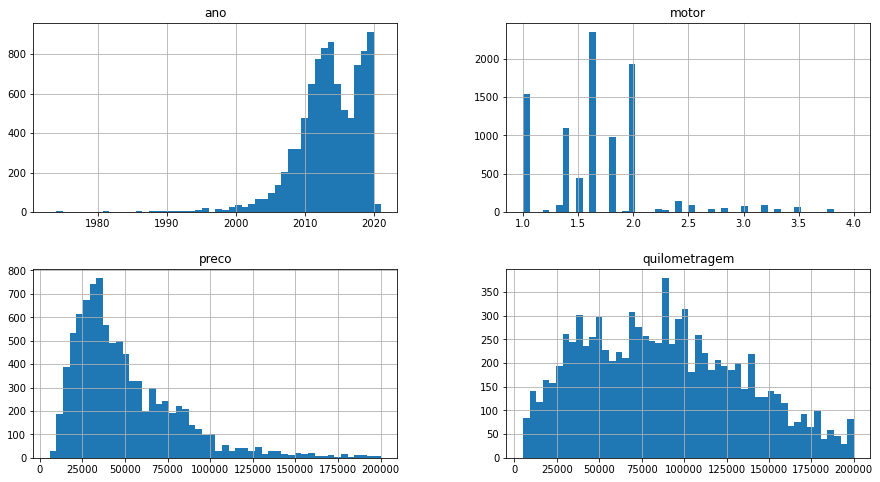

In [20]:
dados.hist(bins=50, figsize=(15,8))

 - Observando outliers  após fazer alguns filtros.

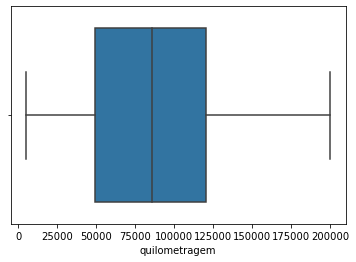

In [21]:
sns.boxplot(dados['quilometragem'])

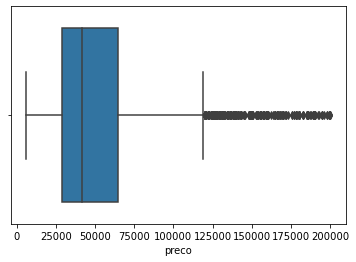

In [22]:
sns.boxplot(dados['preco'])

In [23]:
dados.shape

(9177, 7)

## Tratando a coluna preco

In [24]:
dados.query('preco > 120000').modelo.value_counts()

amarok           42
ranger           35
3008             31
S10              20
frontier         20
Pajero-Full      20
hilux            19
Outlander        15
SW4              15
sportage         14
L200             12
pajero           11
HR-V             11
toro             10
RAV4              8
civic             7
T-Cross           7
Santa-Fe          7
CR-V              6
tucson            5
corolla           4
golf              4
jetta             4
etios             1
Xsara-Picasso     1
grand-siena       1
corsa-classic     1
kombi             1
doblo             1
Pajero-Sport      1
focus             1
spin              1
C4-Cactus         1
palio             1
polo-Sedan        1
saveiro           1
ecosport          1
city              1
C4                1
Name: modelo, dtype: int64

In [25]:
dados.query('preco > 120000 and modelo =="Xsara-Picasso"')

,marca,modelo,motor,quilometragem,ano,preco,informacoes
9984,citroen,Xsara-Picasso,1.6,104000.0,2008,155900.0,Xsara Picasso 1.6 Glx Flex 5p


 - Dividir o DataFrame dados em 2 partes:
 
  Carros com preço acima de 120000 reais.
  
  Carros com preço abaixo de 120000 reais.
  
Tratar os dados incoerentes.

Unir os dois DataFrames

In [44]:
carros_abaixo_120 = dados.query('preco < 120000')
carros_acima_120 = dados.query('preco >=120000')

 - Tratando os dados dos carros com  preço acima de 120000.

In [45]:
carros_acima_120.modelo.value_counts()

amarok           42
ranger           35
3008             31
S10              21
frontier         20
Pajero-Full      20
hilux            19
Outlander        16
SW4              16
sportage         14
L200             12
pajero           11
HR-V             11
toro             10
RAV4              8
civic             7
T-Cross           7
Santa-Fe          7
CR-V              6
tucson            5
corolla           4
golf              4
jetta             4
etios             1
Xsara-Picasso     1
grand-siena       1
corsa-classic     1
kombi             1
doblo             1
Pajero-Sport      1
focus             1
spin              1
C4-Cactus         1
palio             1
polo-Sedan        1
saveiro           1
ecosport          1
city              1
C4                1
Name: modelo, dtype: int64

In [46]:
drop_car = list(dict(carros_acima_120.modelo.value_counts().tail(16)).keys())

In [47]:
carros_acima_120 = carros_acima_120.set_index('modelo')

In [48]:
carros_acima_120 = carros_acima_120.drop(drop_car)

In [49]:
carros_acima_120 = carros_acima_120.reset_index()

In [50]:
carros_acima_120.modelo.value_counts()

amarok         42
ranger         35
3008           31
S10            21
frontier       20
Pajero-Full    20
hilux          19
Outlander      16
SW4            16
sportage       14
L200           12
pajero         11
HR-V           11
toro           10
RAV4            8
Santa-Fe        7
T-Cross         7
civic           7
CR-V            6
tucson          5
golf            4
corolla         4
jetta           4
Name: modelo, dtype: int64

In [51]:
carros_abaixo_120.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,agile,1.4,91000.0,2011,25990.0,Agile 1.4 Lt 5p
1,chevrolet,agile,1.4,78400.0,2011,23499.0,Agile 1.4 Ltz 5p
2,chevrolet,agile,1.4,123915.0,2013,28900.0,Agile 1.4 Ltz 5p
3,chevrolet,agile,1.4,91000.0,2013,28000.0,Agile 1.4 Lt 5p
4,chevrolet,agile,1.4,106863.0,2014,31990.0,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [52]:
carros_acima_120.head()

,modelo,marca,motor,quilometragem,ano,preco,informacoes
0,S10,chevrolet,2.8,21000.0,2020,159900.0,S-10 2.8 Lt 4x4 Cd 16v Turbo
1,S10,chevrolet,2.5,18900.0,2019,139900.0,S-10 Ltz 4x4 Cabine Dupla 2.5
2,S10,chevrolet,2.8,87000.0,2018,135000.0,S10 2.8 Ltz Cab. Dupla 4x4 Aut. 4p
3,S10,chevrolet,2.8,133829.0,2019,138990.0,S-10 S10 Pick-up Lt 2.8 Tdi 4x4 Cd Diesel
4,S10,chevrolet,2.8,104000.0,2018,169990.0,S-10 2.8 High Country 4x4 Cd 16v Turbo


In [53]:
carros_acima_120 = carros_acima_120[['marca','modelo','motor','quilometragem','ano','preco','informacoes']]

In [55]:
carros_acima_120.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,S10,2.8,21000.0,2020,159900.0,S-10 2.8 Lt 4x4 Cd 16v Turbo
1,chevrolet,S10,2.5,18900.0,2019,139900.0,S-10 Ltz 4x4 Cabine Dupla 2.5
2,chevrolet,S10,2.8,87000.0,2018,135000.0,S10 2.8 Ltz Cab. Dupla 4x4 Aut. 4p
3,chevrolet,S10,2.8,133829.0,2019,138990.0,S-10 S10 Pick-up Lt 2.8 Tdi 4x4 Cd Diesel
4,chevrolet,S10,2.8,104000.0,2018,169990.0,S-10 2.8 High Country 4x4 Cd 16v Turbo


 - Unindo os 2 DataFrames.

In [58]:
carros_acima_120.shape

(330, 7)

In [60]:
carros_abaixo_120.shape

(8831, 7)

In [65]:
dados_filtrados = pd.concat([carros_abaixo_120,carros_acima_120 ])

## EDA

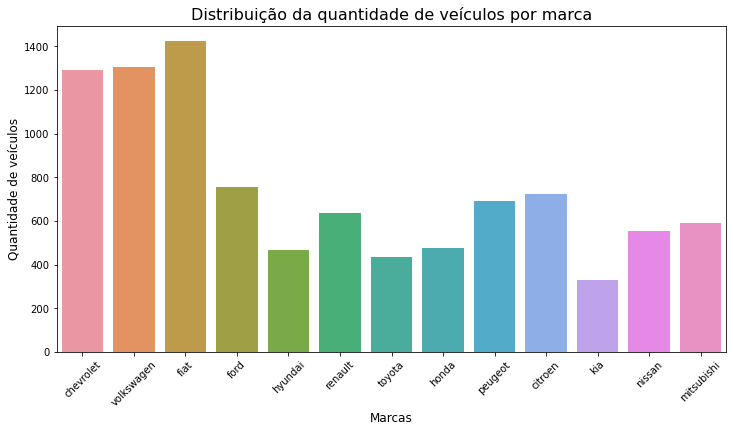

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['marca'],data = dados_filtrados)
plt.title('Distribuição da quantidade de veículos por marca', fontsize = 16)
plt.xlabel('Marcas', fontsize = 12)
plt.ylabel('Quantidade de veículos', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

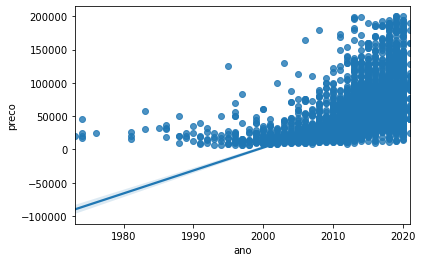

In [68]:
sns.regplot('ano','preco', data = dados_filtrados)

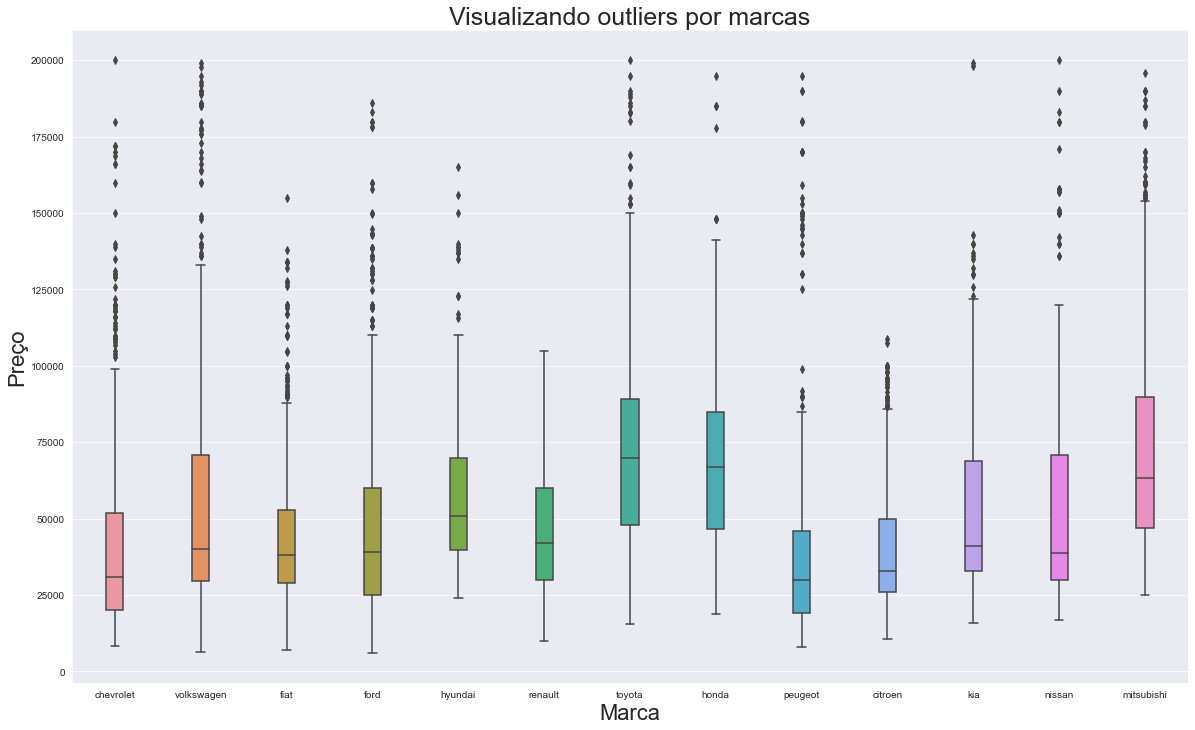

In [69]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='marca', y='preco', data=dados_filtrados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Visualizando outliers por marcas', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Marca', fontsize=22)
ax

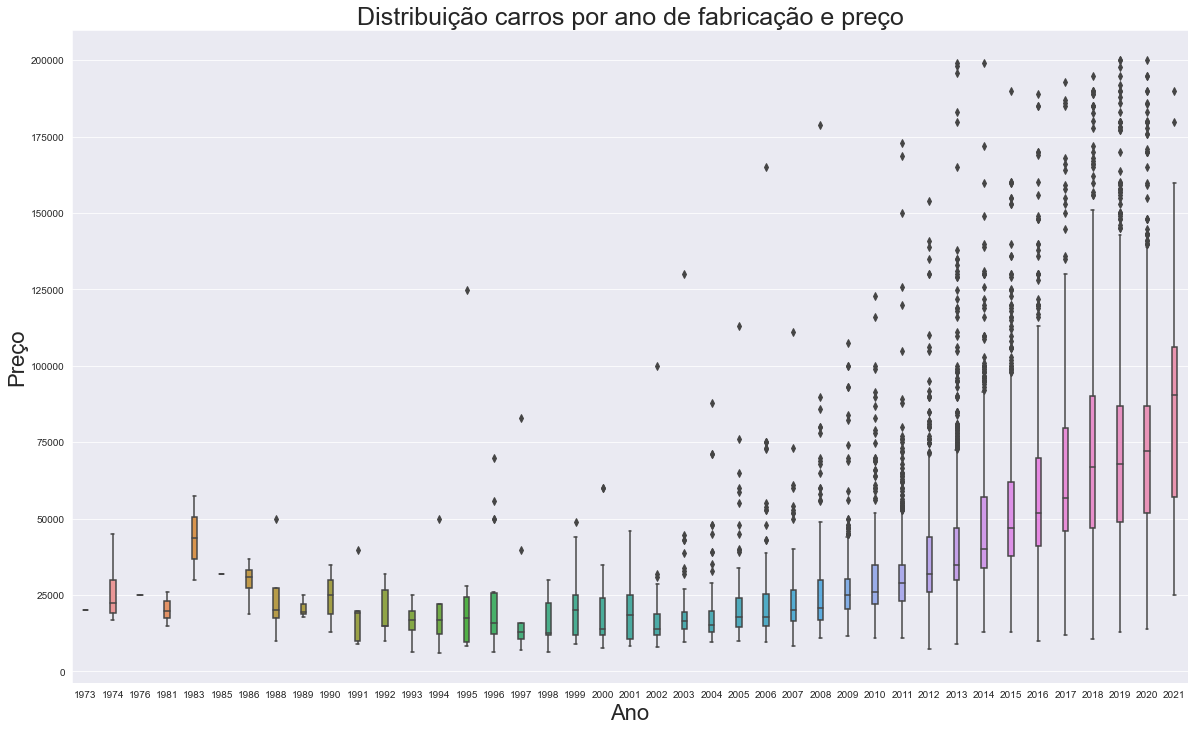

In [70]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='ano', y='preco', data=dados_filtrados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros por ano de fabricação e preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Ano', fontsize=22)
ax

In [71]:
dados_filtrados.columns

Index(['marca', 'modelo', 'motor', 'quilometragem', 'ano', 'preco',
       'informacoes'],
      dtype='object')

Text(0.5, 1.15, 'Dispersão entre as variáveis')

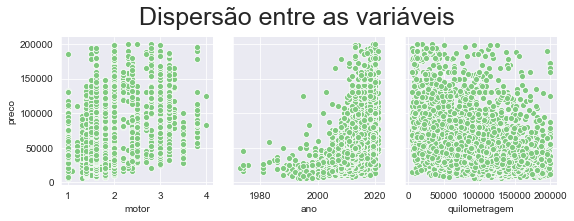

In [72]:
ax = sns.pairplot(data=dados_filtrados,y_vars = 'preco', x_vars = ['motor', 'ano', 'quilometragem'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=25 ,y=1.15)

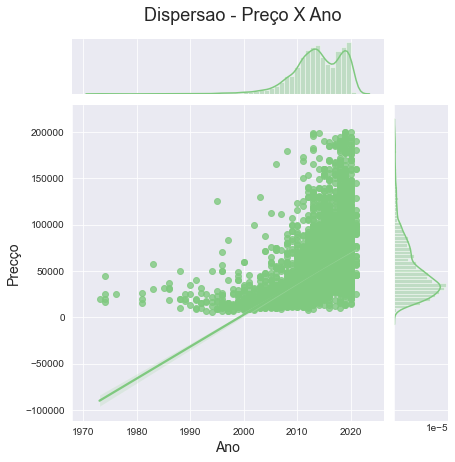

In [73]:
ax = sns.jointplot(x="ano", y="preco", data=dados_filtrados, kind = 'reg')
ax.fig.suptitle('Dispersao - Preço X Ano', fontsize=18, y=1.05)
ax.set_axis_labels("Ano", "Precço", fontsize=14)
ax

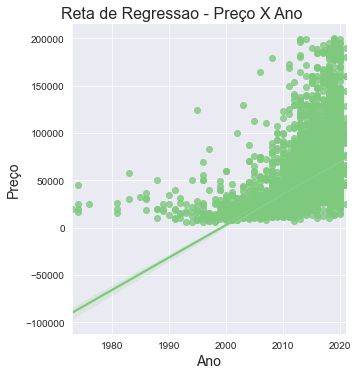

In [74]:
ax= sns.lmplot(x="ano", y="preco", data=dados_filtrados)
ax.fig.suptitle('Reta de Regressao - Preço X Ano', fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Preço", fontsize=14)
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DFA1640A0>,
      dtype=object)

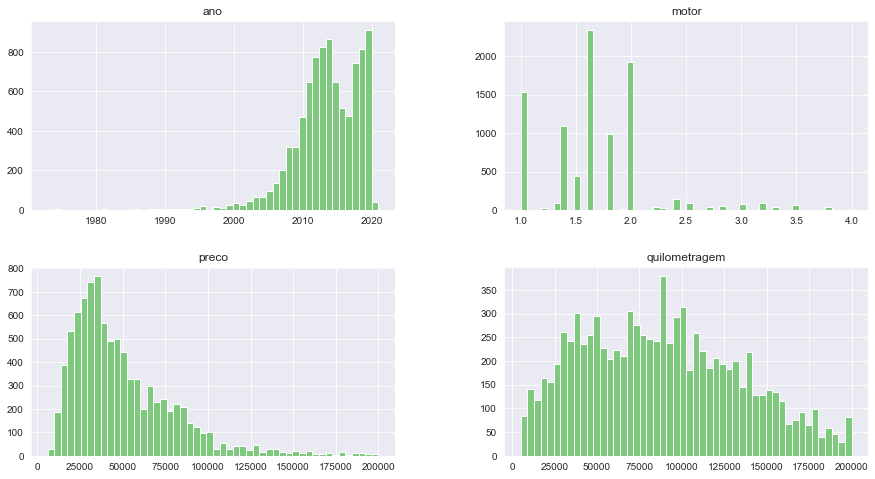

In [81]:
dados_filtrados.hist(bins=50, figsize=(15,8))

 - Salvando o Dataset sem outliers em um arquivo csv.

In [76]:
dados_filtrados.to_csv('carros_populares_filtrados.csv',index =False , encoding = 'utf-8')

In [77]:
teste = pd.read_csv('carros_populares_filtrados.csv', sep = ',')

In [78]:
teste.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,agile,1.4,91000.0,2011,25990.0,Agile 1.4 Lt 5p
1,chevrolet,agile,1.4,78400.0,2011,23499.0,Agile 1.4 Ltz 5p
2,chevrolet,agile,1.4,123915.0,2013,28900.0,Agile 1.4 Ltz 5p
3,chevrolet,agile,1.4,91000.0,2013,28000.0,Agile 1.4 Lt 5p
4,chevrolet,agile,1.4,106863.0,2014,31990.0,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [79]:
teste.shape

(9161, 7)

In [80]:
teste.ano.min()

1973